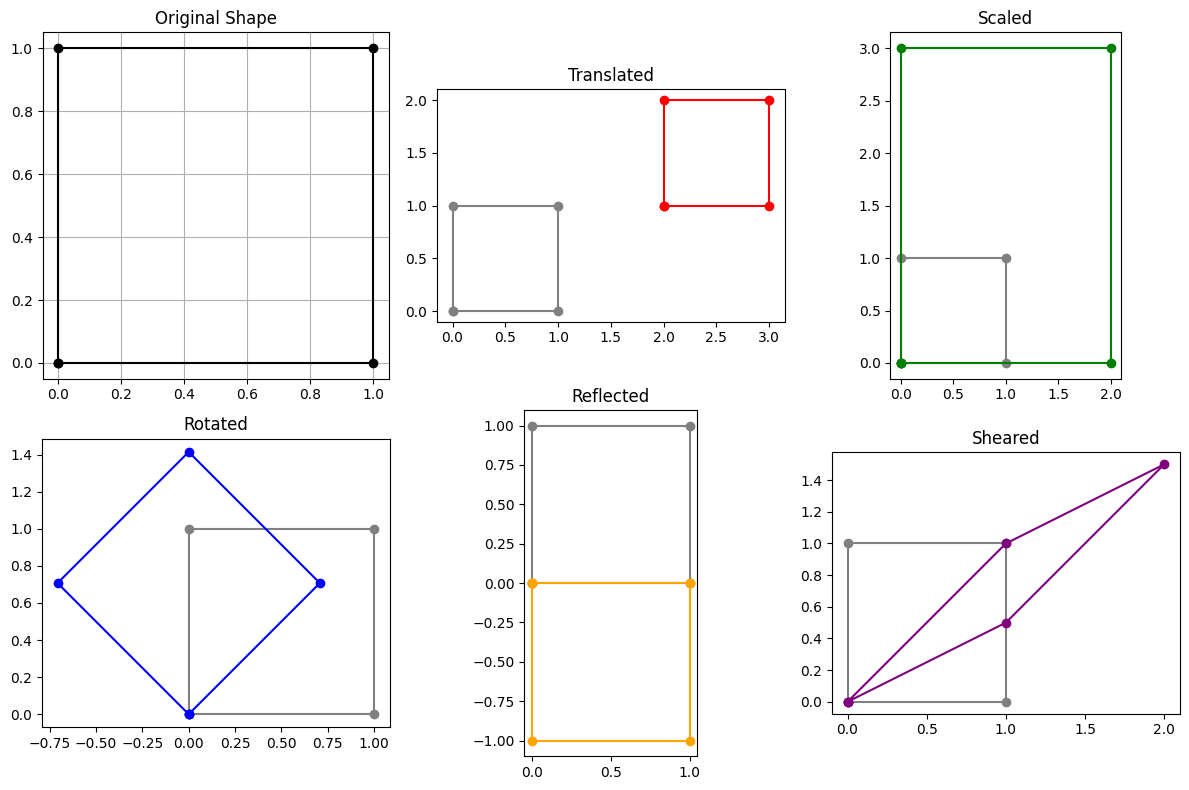

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(shape, title="", color="blue"):
    shape = np.append(shape, [shape[0]], axis=0)  # Close the shape by connecting the last point to the first
    plt.plot(shape[:, 0], shape[:, 1], marker='o', color=color)
    plt.title(title)
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')


def translate(shape, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))
    translated_shape = (translation_matrix @ shape_homogeneous.T).T
    return translated_shape[:, :2]


def scale(shape, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))
    scaled_shape = (scaling_matrix @ shape_homogeneous.T).T
    return scaled_shape[:, :2]


def rotate(shape, angle):
    """Apply rotation to a shape."""
    rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])
    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))
    rotated_shape = (rotation_matrix @ shape_homogeneous.T).T
    return rotated_shape[:, :2]


def reflect(shape, axis):
    """Apply reflection to a shape."""
    if axis == 'x':
        reflection_matrix = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
    elif axis == 'y':
        reflection_matrix = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])
    elif axis == 'origin':
        reflection_matrix = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'origin'.")

    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))
    reflected_shape = (reflection_matrix @ shape_homogeneous.T).T
    return reflected_shape[:, :2]


def shear(shape, shx, shy):
    """Apply shearing to a shape."""
    shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))
    sheared_shape = (shearing_matrix @ shape_homogeneous.T).T
    return sheared_shape[:, :2]


def composite_transform(shape, transformations):
    """Apply a composite transformation to a shape."""
    composite_matrix = np.eye(3)
    for transformation in transformations:
        composite_matrix = transformation @ composite_matrix

    shape_homogeneous = np.hstack((shape, np.ones((shape.shape[0], 1))))
    transformed_shape = (composite_matrix @ shape_homogeneous.T).T
    return transformed_shape[:, :2]

# Example usage
if __name__ == "__main__":
    # Define a square
    square = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

    plt.figure(figsize=(12, 8))

    # Original shape
    plt.subplot(231)
    plot_shape(square, "Original Shape", "black")

    # Translation
    translated_square = translate(square, 2, 1)
    plt.subplot(232)
    plot_shape(square, "Translated Shape", "gray")
    plot_shape(translated_square, "Translated", "red")

    # Scaling
    scaled_square = scale(square, 2, 3)
    plt.subplot(233)
    plot_shape(square, "Scaled Shape", "gray")
    plot_shape(scaled_square, "Scaled", "green")

    # Rotation
    rotated_square = rotate(square, 45)
    plt.subplot(234)
    plot_shape(square, "Rotated Shape", "gray")
    plot_shape(rotated_square, "Rotated", "blue")

    # Reflection
    reflected_square = reflect(square, 'x')
    plt.subplot(235)
    plot_shape(square, "Reflected Shape", "gray")
    plot_shape(reflected_square, "Reflected", "orange")

    # Shearing
    sheared_square = shear(square, 1, 0.5)
    plt.subplot(236)
    plot_shape(square, "Sheared Shape", "gray")
    plot_shape(sheared_square, "Sheared", "purple")

    plt.tight_layout()
    plt.show()


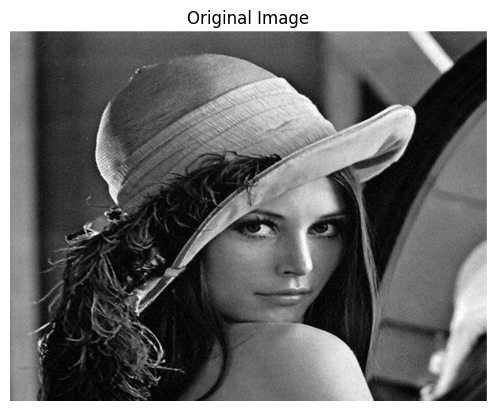

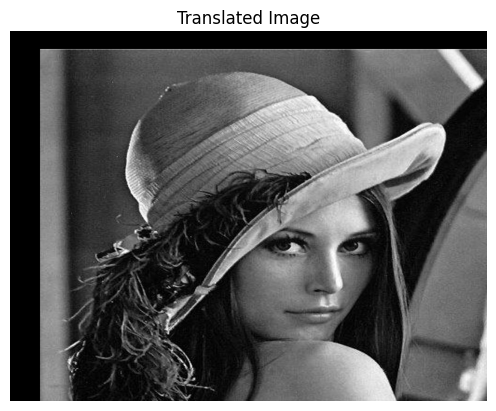

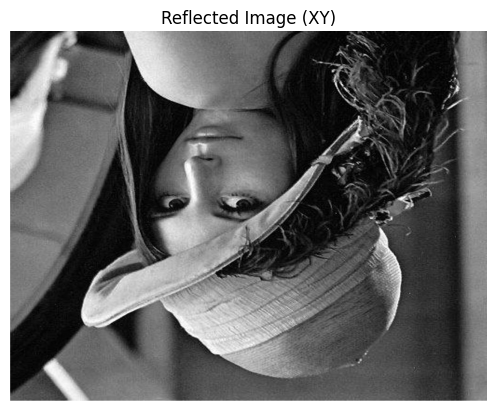

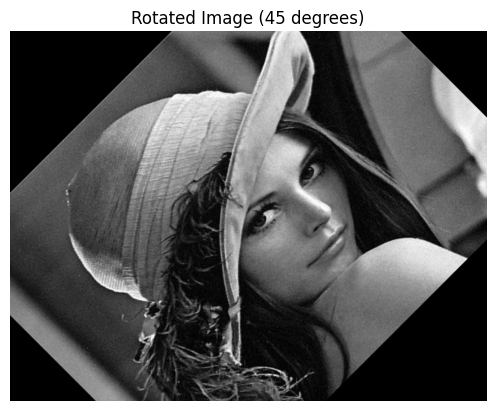

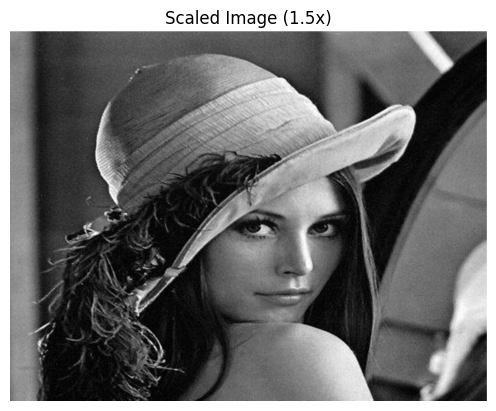

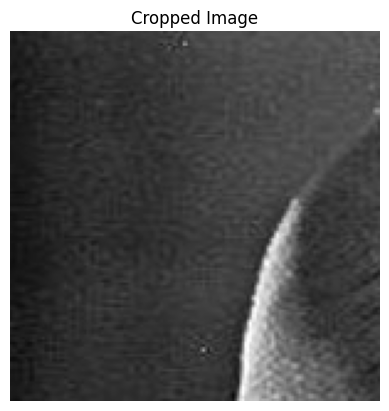

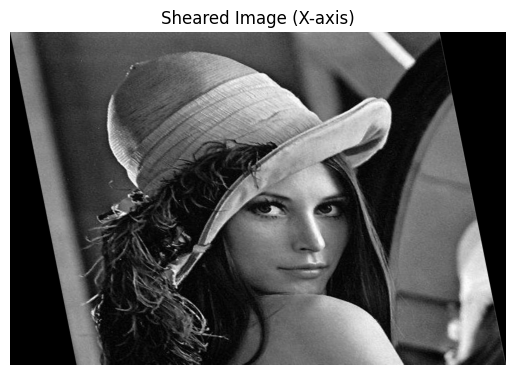

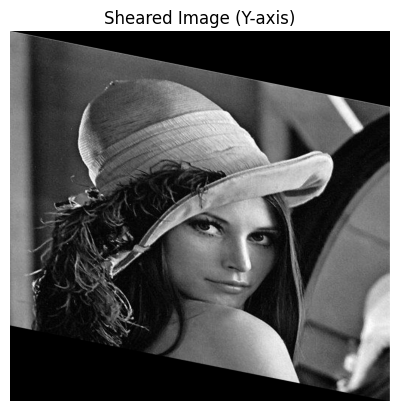

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(title, image):
    """Display an image using Matplotlib."""
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
image_path = "/content/image.jpg"  # Replace with your image path
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Display the original image
display_image("Original Image", image)

# Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

translated_image = translate_image(image, 50, 30)
display_image("Translated Image", translated_image)

# Reflection
def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'xy':
        reflected_image = cv2.flip(image, -1)
    else:
        raise ValueError("Axis must be 'x', 'y', or 'xy'")
    return reflected_image

reflected_image = reflect_image(image, 'xy')
display_image("Reflected Image (XY)", reflected_image)

# Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

rotated_image = rotate_image(image, 45)
display_image("Rotated Image (45 degrees)", rotated_image)

# Scaling
def scale_image(image, fx, fy):
    scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_image

scaled_image = scale_image(image, 1.5, 1.5)
display_image("Scaled Image (1.5x)", scaled_image)

# Cropping
def crop_image(image, start_x, start_y, end_x, end_y):
    cropped_image = image[start_y:end_y, start_x:end_x]
    return cropped_image

cropped_image = crop_image(image, 50, 50, 200, 200)
display_image("Cropped Image", cropped_image)

# Shearing in X-axis
def shear_image_x(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols + int(shear_factor * rows), rows))
    return sheared_image

sheared_image_x = shear_image_x(image, 0.2)
display_image("Sheared Image (X-axis)", sheared_image_x)

# Shearing in Y-axis
def shear_image_y(image, shear_factor):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (cols, rows + int(shear_factor * cols)))
    return sheared_image

sheared_image_y = shear_image_y(image, 0.2)
display_image("Sheared Image (Y-axis)", sheared_image_y)